In [1035]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

## Functions for use in AIMD

In [1036]:
def add(current_cwnd, alpha):
    return current_cwnd + alpha

def exp(current_cwnd, alpha, power=1.5):
    return current_cwnd + (alpha * (current_cwnd ** power))

def log(current_cwnd, alpha):
    return current_cwnd + (alpha * np.log(current_cwnd + 1))

def inverse(current_cwnd, alpha):
    return current_cwnd + (alpha * 5/(current_cwnd+1))

def mul(current_cwnd, beta):
    return current_cwnd * beta

## Variable initialisations

In [1037]:
# Number of AIMD iterations to simulate
MAX_ITERATIONS = 100

# Maximum capacity of the bottleneck shared by all users
MAX_CAPACITY = 10

# AIMD parameters for User 1
cwnd1 = 2
alpha1 = 2
beta1 = 0.5
increase_fn1 = add
decrease_fn1 = mul

# AIMD parameters for User 2
cwnd2 = 5
alpha2 = 1
beta2 = 0.5
increase_fn2 = add
decrease_fn2 = mul

# AIMD parameters for User 3
# cwnd3 = 3
# alpha3 = 2
# beta3 = 0.8

alphas = [alpha1, alpha2]
betas = [beta1, beta2]

# Store useful information at each iteration
step = []
cwnd1_values = np.zeros(MAX_ITERATIONS + 1)
cwnd2_values = np.zeros(MAX_ITERATIONS + 1)
# cwnd3_values = np.zeros(MAX_ITERATIONS + 1)

##  Perron-Frobenius right eigenvector of matrix A
<!-- ![title](MatrixA.png) -->
<img src="MatrixA.png" align="left" width=240 height=240 />

In [1038]:
a = np.diag(betas) + \
(1/sum(alphas)) * \
np.array(alphas).reshape(-1,1) * \
np.array(list(map(lambda beta:1-beta, betas)))

In [1039]:
eigenvalues, eigenvectors = np.linalg.eig(a)
pf_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(pf_eigenvector)

[0.89442719 0.4472136 ]


## AIMD iteration simulation

In [1040]:
for i in range(MAX_ITERATIONS):
    cwnd1_values[i] = cwnd1
    cwnd2_values[i] = cwnd2
#     cwnd3_values[i] = cwnd3
    if (cwnd1 + cwnd2 <= MAX_CAPACITY):
        step.append('I')
        cwnd1 = increase_fn1(cwnd1, alpha=alpha1)
        cwnd2 = increase_fn2(cwnd2, alpha=alpha2)
#         cwnd3 = increase_fn(cwnd3, alpha3)
    else:
        step.append('D')
        cwnd1 = decrease_fn1(cwnd1, beta=beta1)
        cwnd2 = decrease_fn2(cwnd2, beta=beta2)
#         cwnd3 = decrease_fn(cwnd3, beta3)
        
# Store values in arrays
cwnd1_values[-1] = cwnd1
cwnd2_values[-1] = cwnd2
# cwnd3_values[-1] = cwnd3
    
# Display the procedure taken in each iteration
print(f"{MAX_ITERATIONS} iterations completed:", step)

# Display the final values
print("Last 5 values of cwnd1:", cwnd1_values[-5:])
print("Last 5 values of cwnd2:", cwnd2_values[-5:])
# print("Last 5 values of cwnd3:", cwnd3_values[-5:])

100 iterations completed: ['I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I', 'I', 'D', 'I']
Last 5 values of cwnd1: [4. 6. 8. 4. 6.]
Last 5 values of cwnd2: [2. 3. 4. 2. 3.]


## Data visualisation

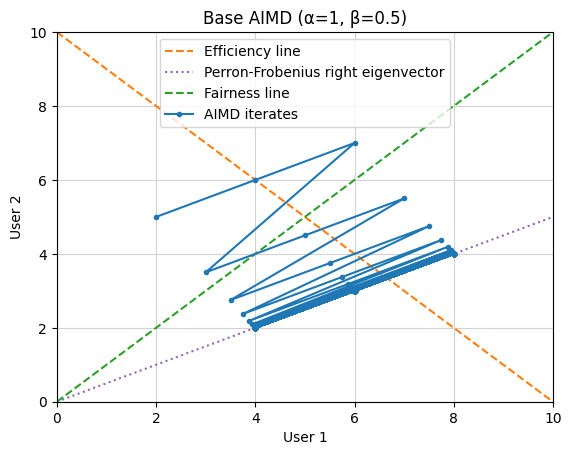

In [1041]:
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY,-1,-1), color='tab:orange', linestyle='--', label='Efficiency line')
plt.axline([0,0], pf_eigenvector, color='tab:purple', linestyle=':', label='Perron-Frobenius right eigenvector')
plt.plot(range(MAX_CAPACITY+1), range(MAX_CAPACITY+1), color='tab:green', linestyle='--', label='Fairness line')
plt.plot(cwnd1_values, cwnd2_values, marker='.', color='tab:blue', label='AIMD iterates')


plt.ylim([0,MAX_CAPACITY])
plt.xlim([0,MAX_CAPACITY])
plt.xlabel('User 1')
plt.ylabel('User 2')
plt.grid(color='lightgrey')
plt.legend()
plt.title(f'Base AIMD (α=1, β=0.5)')
plt.show()